In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
df = pd.read_csv('df_train.csv')
df.drop(columns =['Unnamed: 0'], inplace=True)

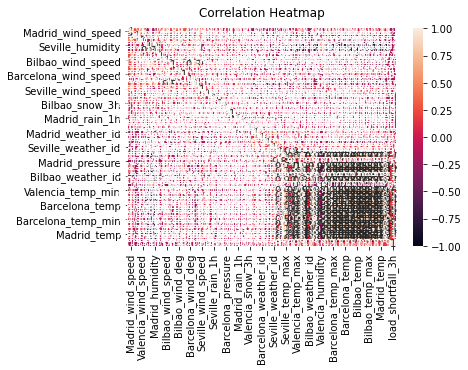

In [21]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Select The Sate you are Supposed to do an EDA o and Proceed on this Notebok** 

In [3]:
madrid = df[['time','Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all',
             'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure',
             'Madrid_temp_max','Madrid_temp','Madrid_temp_min','load_shortfall_3h']]

In [4]:
madrid.head(5)

,time,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,64.000000,0.0,0.0,800.0,971.333333,265.938000,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,64.666667,0.0,0.0,800.0,972.666667,266.386667,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,64.333333,0.0,0.0,800.0,974.000000,272.708667,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,56.333333,0.0,0.0,800.0,994.666667,281.895219,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,57.000000,0.0,0.0,800.0,1035.333333,280.678437,280.678437,280.678437,6620.666667


In [5]:
madrid.isnull().sum()

time                 0
Madrid_wind_speed    0
Madrid_humidity      0
Madrid_clouds_all    0
Madrid_rain_1h       0
Madrid_weather_id    0
Madrid_pressure      0
Madrid_temp_max      0
Madrid_temp          0
Madrid_temp_min      0
load_shortfall_3h    0
dtype: int64

This verifies that there are no null values in the Madrid columns.

In [6]:
madrid.describe()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,57.414717,19.473392,0.037818,773.527594,1010.316920,289.540309,288.419439,287.202203,10673.857612
std,1.850371,24.335396,28.053660,0.152639,77.313315,22.198555,9.752047,9.346796,9.206237,5218.046404
min,0.000000,6.333333,0.000000,0.000000,211.000000,927.666667,264.983333,264.983333,264.983333,-6618.000000
25%,1.000000,36.333333,0.000000,0.000000,800.000000,1012.333333,282.150000,281.404281,280.299167,7390.333333
50%,2.000000,58.000000,0.000000,0.000000,800.000000,1017.333333,288.116177,287.053333,286.083333,11114.666667
75%,3.333333,78.666667,33.333333,0.000000,800.666667,1022.000000,296.816667,295.154667,293.884500,14498.166667
max,13.000000,100.000000,100.000000,3.000000,804.000000,1038.000000,314.483333,313.133333,310.383333,31904.000000


The above summarizes the statistic data for all Madrid columns. 



From my observation, I noticed that the max and min temperatures in Madrid are basically the same as the normal temperature in Madrid. Hence, I found it to be redundant. 

Note from the overview on kaggle, the measure of shortfall is a function of the summation of humidity, rainfall, wind_speed and so on. Shortfall depicts a form of target that is required to be met, therefore, 

In [7]:
madrid.kurtosis()

Madrid_wind_speed     2.036462
Madrid_humidity      -1.167537
Madrid_clouds_all     0.142079
Madrid_rain_1h       76.584491
Madrid_weather_id     9.259047
Madrid_pressure       2.216199
Madrid_temp_max      -0.662861
Madrid_temp          -0.612299
Madrid_temp_min      -0.666646
load_shortfall_3h    -0.118999
dtype: float64

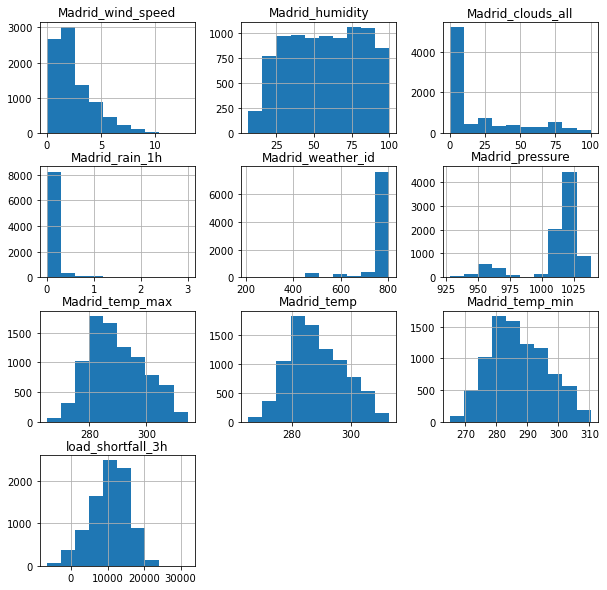

In [9]:
features = ['Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all', 'Madrid_rain_1h', 'Madrid_weather_id','Madrid_pressure', 'Madrid_temp_max', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'] # create a list of all numerical features
madrid[features].hist(figsize=(10,10));

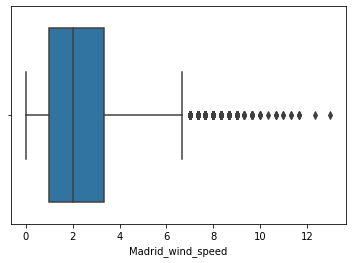

In [18]:
sns.boxplot(x='Madrid_wind_speed', data=df); 

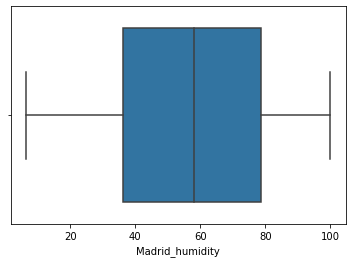

In [17]:
sns.boxplot(x='Madrid_humidity', data=df);

<AxesSubplot:xlabel='Madrid_pressure'>

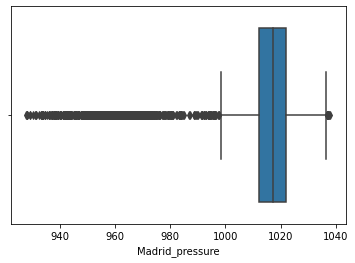

In [19]:
sns.boxplot(x='Madrid_pressure', data=df)

In [20]:
madrid.corr()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,-0.137092,0.230126,0.150446,-0.169358,-0.136672,0.091464,0.109572,0.098138,-0.150981
Madrid_humidity,-0.137092,1.000000,0.484293,0.250614,-0.341407,-0.121737,-0.803260,-0.802605,-0.759633,-0.150536
Madrid_clouds_all,0.230126,0.484293,1.000000,0.402147,-0.533331,-0.190070,-0.279732,-0.262908,-0.245475,-0.081623
Madrid_rain_1h,0.150446,0.250614,0.402147,1.000000,-0.718816,-0.081161,-0.116052,-0.105667,-0.094601,-0.027159
Madrid_weather_id,-0.169358,-0.341407,-0.533331,-0.718816,1.000000,0.098011,0.149340,0.136829,0.123498,0.030868
Madrid_pressure,-0.136672,-0.121737,-0.190070,-0.081161,0.098011,1.000000,0.092253,0.054819,0.014089,0.092638
Madrid_temp_max,0.091464,-0.803260,-0.279732,-0.116052,0.149340,0.092253,1.000000,0.988871,0.939147,0.182548
Madrid_temp,0.109572,-0.802605,-0.262908,-0.105667,0.136829,0.054819,0.988871,1.000000,0.973641,0.186036
Madrid_temp_min,0.098138,-0.759633,-0.245475,-0.094601,0.123498,0.014089,0.939147,0.973641,1.000000,0.174744
load_shortfall_3h,-0.150981,-0.150536,-0.081623,-0.027159,0.030868,0.092638,0.182548,0.186036,0.174744,1.000000


We all understand what the boxplot is all about. We the min range, Q1 range, median, Q2 and max ranges. Dots after the max range values, indicate that there is a presence of outliers and they start from the value around 6.somthething..

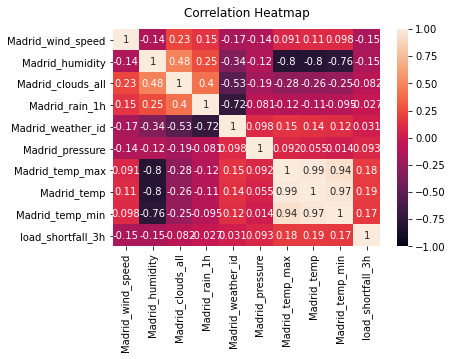

In [15]:
heatmap = sns.heatmap(madrid.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);